Data Loading and Preliminary Analysis

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('phishing.csv')

# Display the first few rows of the dataset
print(data.head())

# Summary of the dataset to understand the types and count of data
print(data.info())

# Descriptive statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


     FILENAME                                 URL  URLLength  \
0  521848.txt    https://www.southbankmosaics.com         31   
1   31372.txt            https://www.uni-mainz.de         23   
2  597387.txt      https://www.voicefmradio.co.uk         29   
3  554095.txt         https://www.sfnmjournal.com         26   
4  151578.txt  https://www.rewildingargentina.org         33   

                       Domain  DomainLength  IsDomainIP  TLD  \
0    www.southbankmosaics.com            24           0  com   
1            www.uni-mainz.de            16           0   de   
2      www.voicefmradio.co.uk            22           0   uk   
3         www.sfnmjournal.com            19           0  com   
4  www.rewildingargentina.org            26           0  org   

   URLSimilarityIndex  CharContinuationRate  TLDLegitimateProb  ...  Pay  \
0               100.0              1.000000           0.522907  ...    0   
1               100.0              0.666667           0.032650  ...    0   
2 

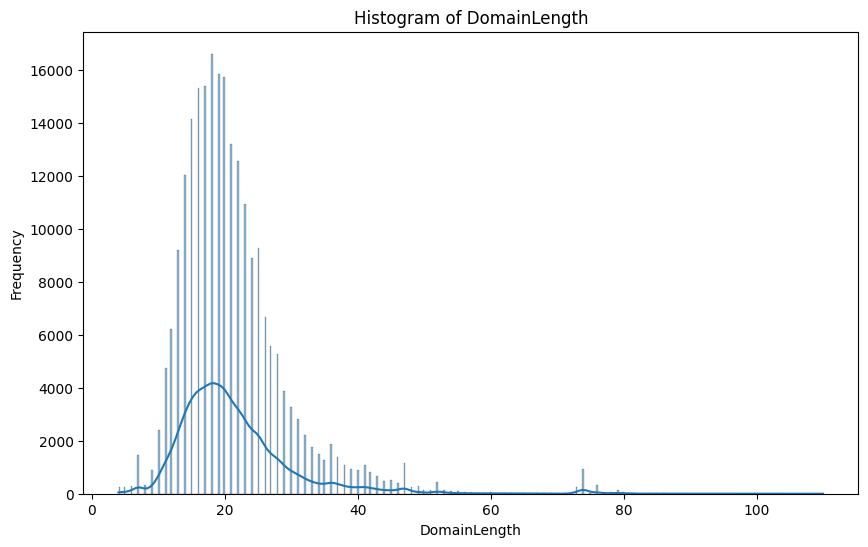

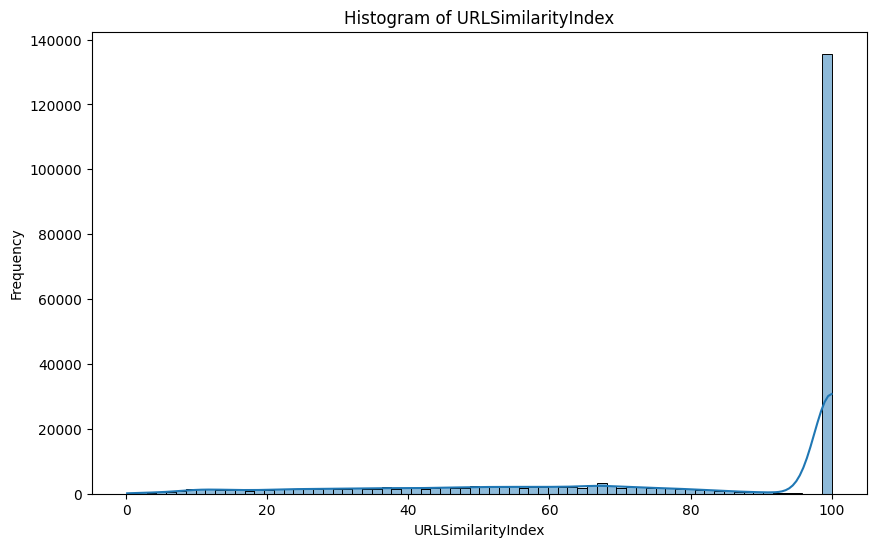

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Define numeric features to visualize with histograms
numeric_features = ['DomainLength', 'URLSimilarityIndex']

# Plot histograms
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


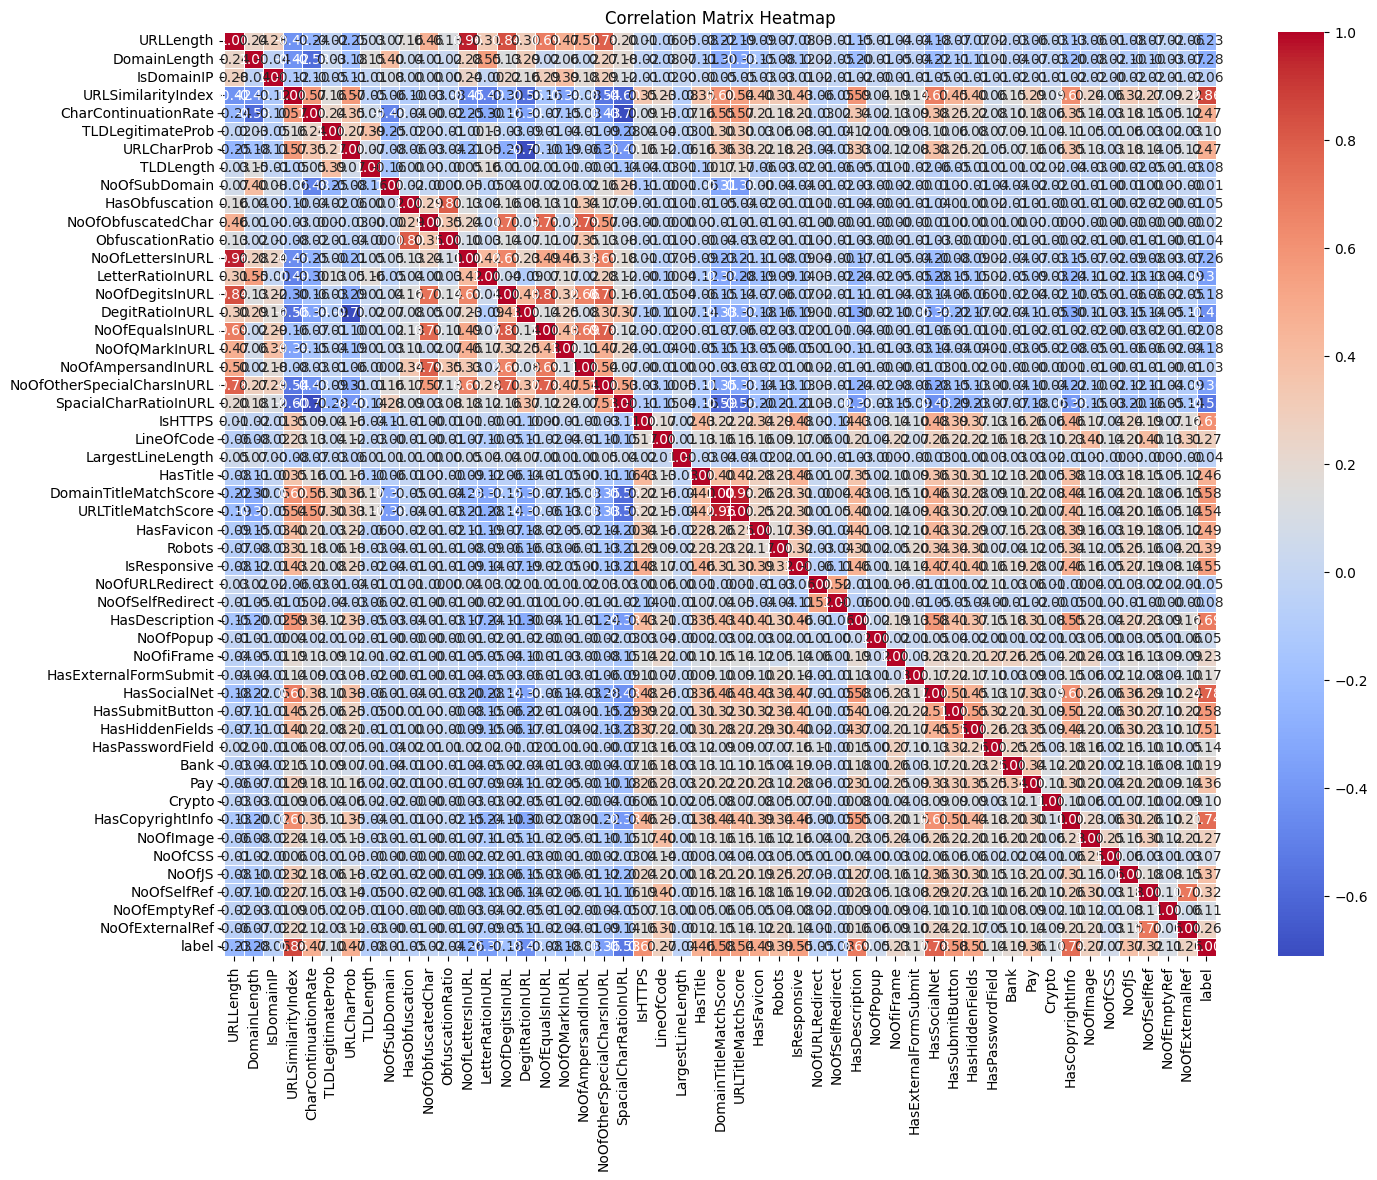

In [4]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


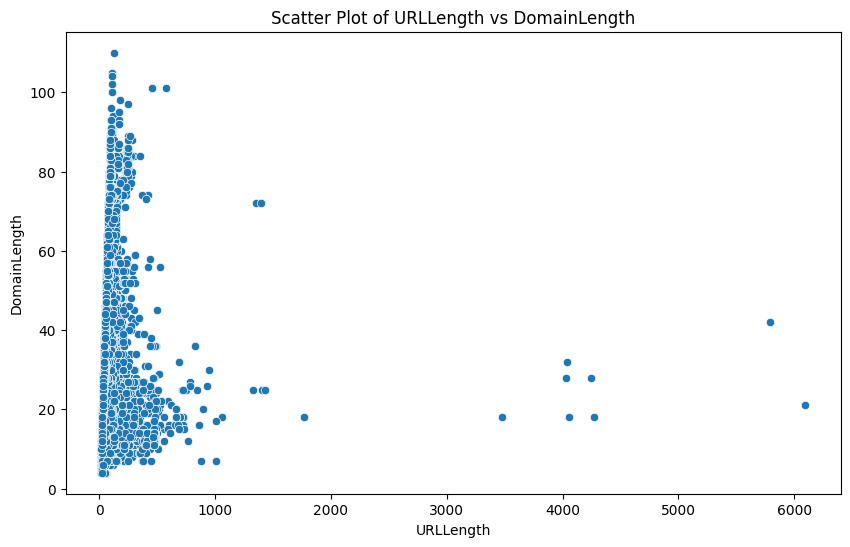

Correlation between URLLength and DomainLength: 0.24309138684232842


In [5]:
# Scatter plot for URLLength and DomainLength
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['URLLength'], y=data['DomainLength'])
plt.title('Scatter Plot of URLLength vs DomainLength')
plt.xlabel('URLLength')
plt.ylabel('DomainLength')
plt.show()

# Print correlation
print("Correlation between URLLength and DomainLength:", correlation_matrix.loc['URLLength', 'DomainLength'])


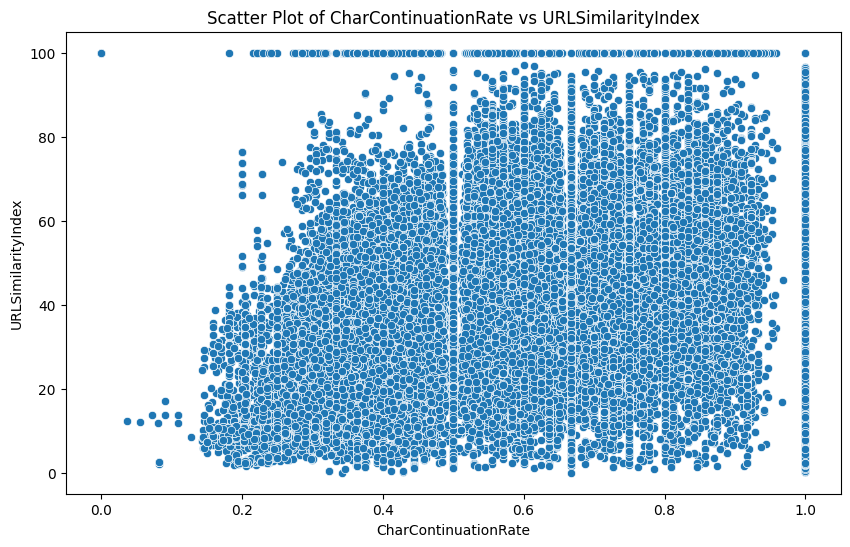

Correlation between CharContinuationRate and URLSimilarityIndex: 0.5729379086681935


In [6]:
# Scatter plot for CharContinuationRate and URLSimilarityIndex
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['CharContinuationRate'], y=data['URLSimilarityIndex'])
plt.title('Scatter Plot of CharContinuationRate vs URLSimilarityIndex')
plt.xlabel('CharContinuationRate')
plt.ylabel('URLSimilarityIndex')
plt.show()

# Print correlation
print("Correlation between CharContinuationRate and URLSimilarityIndex:", correlation_matrix.loc['CharContinuationRate', 'URLSimilarityIndex'])


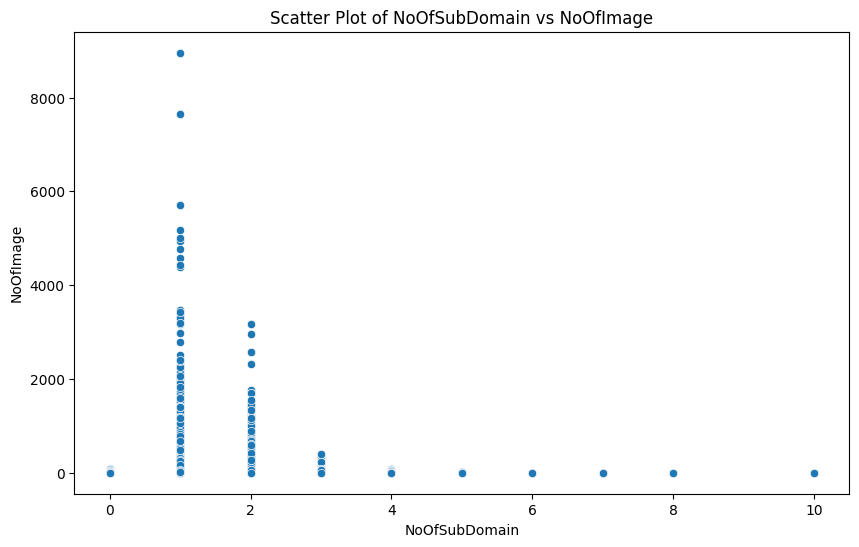

Correlation between NoOfSubDomain and NoOfImage: -0.009473826674915711


In [7]:
# Scatter plot for NoOfSubDomain and NoOfImage
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['NoOfSubDomain'], y=data['NoOfImage'])
plt.title('Scatter Plot of NoOfSubDomain vs NoOfImage')
plt.xlabel('NoOfSubDomain')
plt.ylabel('NoOfImage')
plt.show()

# Print correlation
print("Correlation between NoOfSubDomain and NoOfImage:", correlation_matrix.loc['NoOfSubDomain', 'NoOfImage'])


In [2]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns to scale
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = StandardScaler().fit_transform(data[numerical_cols])

In [ ]:
# Converting categorical columns to numerical
data['TLD'] = data['TLD'].astype('category').cat.codes

In [4]:
from sklearn.decomposition import PCA

# Applying PCA to reduce dimensions while capturing 95% variance
pca = PCA(n_components=0.95)
reduced_data = pca.fit_transform(data[numerical_cols])

# Exploring how many components PCA chose
print("PCA chose ", pca.n_components_, " components")


PCA chose  36  components


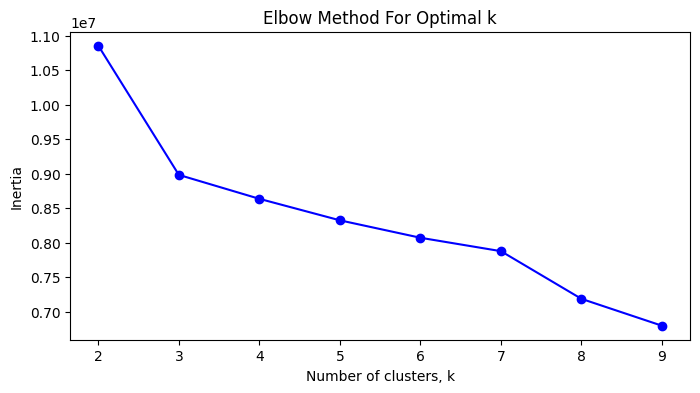

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
range_values = range(2, 10)

for k in range_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range_values, inertias, 'bo-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


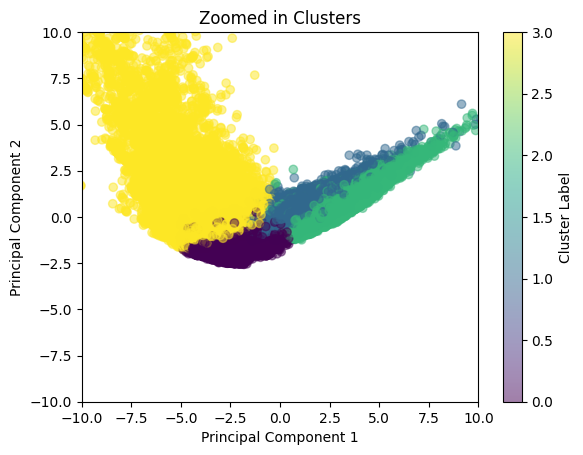

In [23]:
from sklearn.cluster import KMeans

# Applying KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(reduced_data)

# Visualizing the clusters
import matplotlib.pyplot as plt

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, alpha=0.5, cmap='viridis')
plt.xlim(-10, 10)  # Adjust based on your specific data
plt.ylim(-10, 10)  # Adjust based on your specific data
plt.title('Zoomed in Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()



In [24]:
# Assuming 'kmeans' is your trained model and 'data' is your full dataset
centroids = kmeans.cluster_centers_
print("Centroids:\n", centroids)

for i in range(3):  # Adjust the range based on the number of clusters
    cluster_data = data[kmeans.labels_ == i]
    print(f"Stats for cluster {i}:\n", cluster_data.describe())


Centroids:
 [[-2.35612398e+00 -1.72248484e+00  1.39340457e+00 -1.33067513e-01
   7.99427819e-01 -3.21890030e-01  3.08654553e-01  1.44268644e-01
  -2.86681362e-01  2.48662250e-01 -3.24482771e-01  1.90140481e-01
   2.08986032e-01  8.08025321e-02  2.58389389e-02  4.36807644e-02
  -2.19881372e-02 -1.46122670e-02 -1.00449201e-01 -3.47573435e-02
  -6.92406039e-02  1.32605237e-01  1.15317663e-02  1.01293402e-01
  -1.37098666e-01  1.34913162e-02  1.58315000e-01  1.54269108e-01
   8.13152064e-02 -3.62302816e-02  1.08725039e-01 -2.19037059e-02
   6.90821420e-02 -6.32900342e-03  4.12313944e-02  1.04851684e-01]
 [ 1.23292830e+00  3.77630854e-01 -1.94145128e+00 -1.57780506e+00
  -4.77663334e-01  1.22992607e-01  4.87466772e-01  6.64537759e-01
  -3.68549808e-01  4.40719832e-01 -1.91490613e-01  1.89739379e-02
  -2.00887478e-01  2.01036244e-02  6.55528182e-02 -6.90067753e-04
  -7.16070538e-02 -2.80223230e-01  2.65182648e-01  1.31784963e-01
  -9.16824681e-02 -8.51333130e-02  1.03418328e-01 -1.01812432e-

In [25]:
data['cluster'] = clusters
contingency_table = pd.crosstab(data['cluster'], data['label'])

print(contingency_table)


label        0       1
cluster               
0        48712     146
1          123   29220
2          444  105478
3        51666       6


In [14]:
from sklearn import metrics
import numpy as np
def purity_score(y_true, y_pred):
    # Compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

purity = purity_score(data['label'], data['cluster'])
print("Purity Score:", purity)


Purity Score: 0.9955045696473632


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
data = pd.read_csv('phishing.csv')

# Convert categorical variables (if any)
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Drop non-numeric columns if necessary (here 'URL' is assumed to be non-numeric)
data.drop(['URL'], axis=1, inplace=True)  # Example of dropping the 'URL' column if it's categorical

# Split data into features and target
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = model.predict(X_test_scaled)

# Print out the classification report and accuracy
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

Accuracy: 0.9998515659789223
